**OBJECTIVE**:
* **TO UNDERSTAND K-MEANS CLUSTERING ** 
* **TO LEARN HOW DOES CLUSTER ARE DIVIDED** 
* **UNDERSTANDING ELBOW METHOD, HOW TO SELECT K VALUE**
* **UNDERSTANDING SILHOUETTE METHOD**
* **DESCRPITIVE STATS OF CLUSTER** 

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.cluster import SilhouetteVisualizer

# Demo- 1 

In [105]:
# create a sample dataset
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [106]:
# create a k-means clustering object with K=3
kmeans = KMeans(n_clusters=2)

In [107]:
# fit the k-means clustering object to the dataset
kmeans.fit(X)

KMeans(n_clusters=2)

In [108]:
# assign the clusters to the data points
labels = kmeans.labels_
labels

array([0, 0, 1, 1, 0, 1])

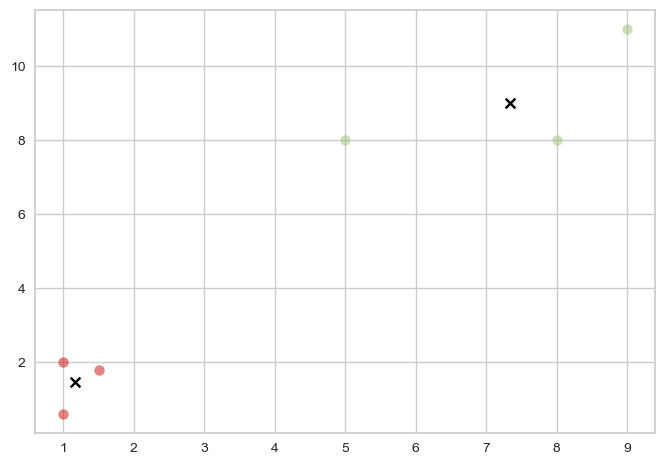

In [109]:
# plot the data points colored by their cluster assignment
colors = ['r', 'g']
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]],alpha=0.5)

# plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')

# show the plot
plt.show()

In [110]:
# calculate the cost of clustering (inertia)
cost = kmeans.inertia_
print("Cost of clustering:", cost)

Cost of clustering: 15.98


In [111]:
kmeans.cluster_centers_

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

OBSERVATION : 
* Above data has been divied into two cluster 
* Each cluster has its cluster center 
* The cost of two cluster is 15.98 

# Demo-2

In [112]:
# generate a sample dataset with 4 features and 250 data points
np.random.seed(4)
X = np.random.randn(250, 4)

In [113]:
# convert the numpy array to a Pandas DataFrame
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4'])

In [114]:
df.head()

,X1,X2,X3,X4
0,0.050562,0.499951,-0.995909,0.693599
1,-0.418302,-1.584577,-0.647707,0.598575
2,0.332250,-1.147477,0.618670,-0.087987
3,0.425072,0.332253,-1.156816,0.350997
4,-0.606887,1.546979,0.723342,0.046136


In [115]:
# creating a list of possible K values
k_values = range(1, 10)

In [116]:
# calculating the cost of clustering for each K value
costs = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)

In [117]:
costs  # cost of each cluster 

[904.4195152370237,
 737.7809305354599,
 624.2042869547191,
 536.6810629896844,
 470.8576181865922,
 429.27399737280956,
 393.1365314468461,
 369.05559674056565,
 348.14875631295513]

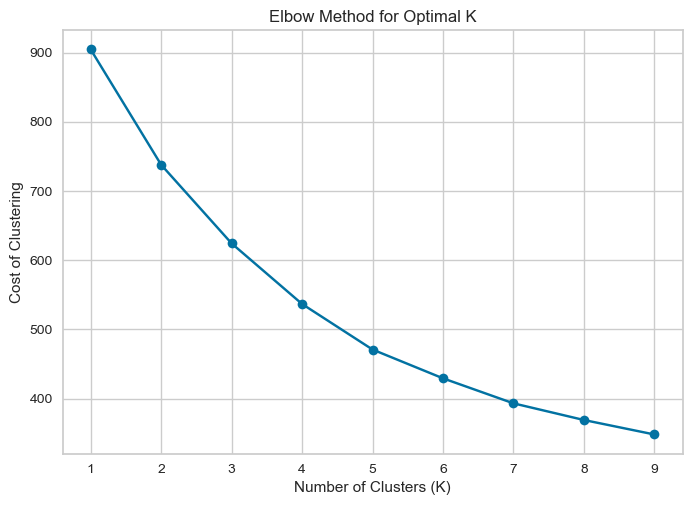

In [118]:
# plot the cost of clustering vs. K
plt.plot(k_values, costs, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost of Clustering')
plt.title('Elbow Method for Optimal K')
plt.show()

OBSERVATION :
* As the no of cluster increase the cost of clustering reduce.
* The optimum value of k is selected at steepest curve.
* This method is called elbow method

# Demo- 3

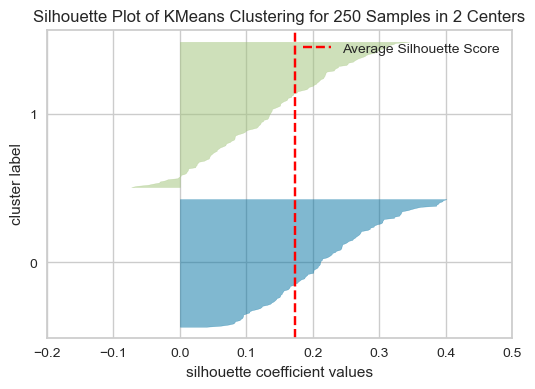

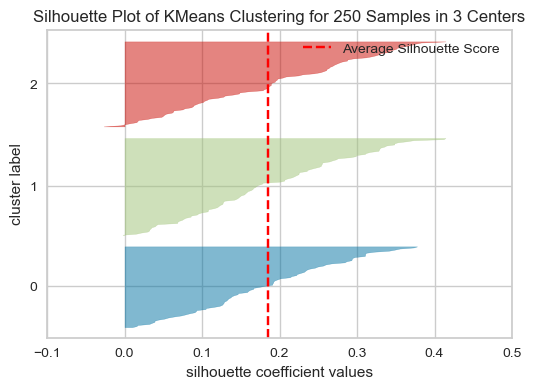

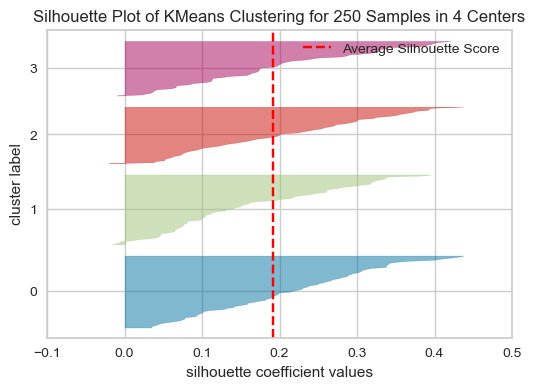

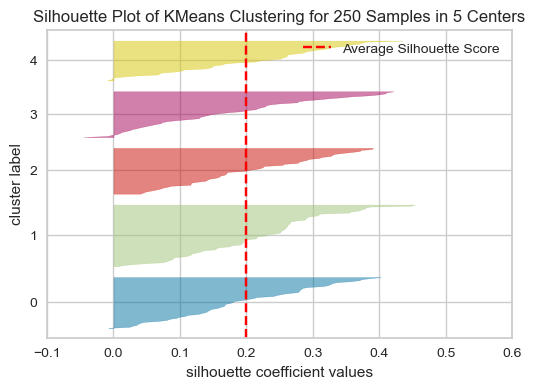

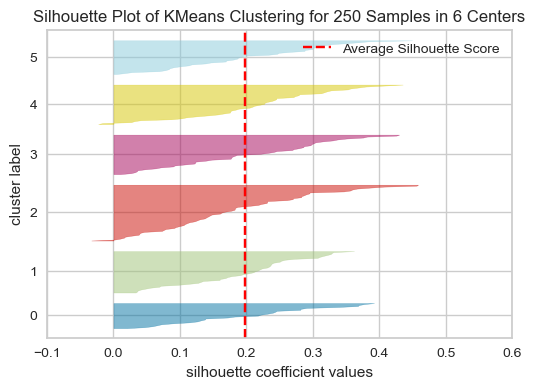

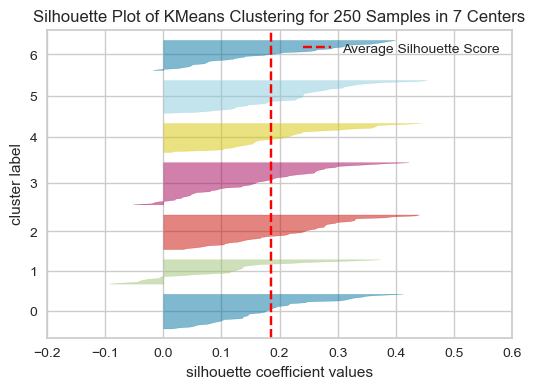

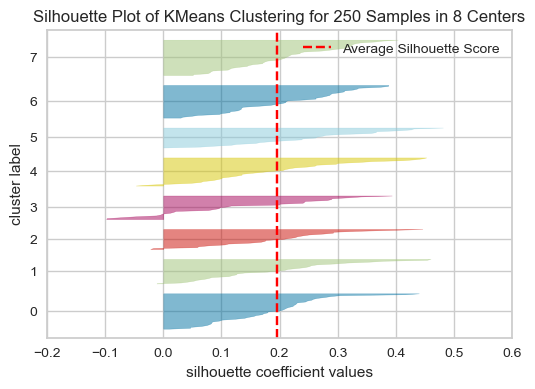

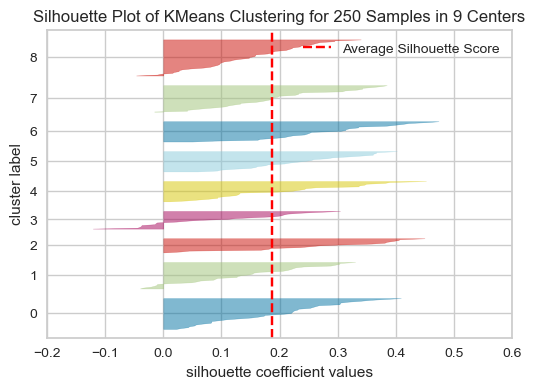

In [119]:
# create a list of possible K values
k_values = range(2, 10) 

# calculate the cost and silhouette score of clustering for each K value
costs = []
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    # create a silhouette plot using Yellowbrick
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

In [120]:
# interpretion of the silhouette plot
# there should be no outliers (which show as -ve silhouette coefficient values)
# all clusters should be above the overall avg line which shows as the red dashes line

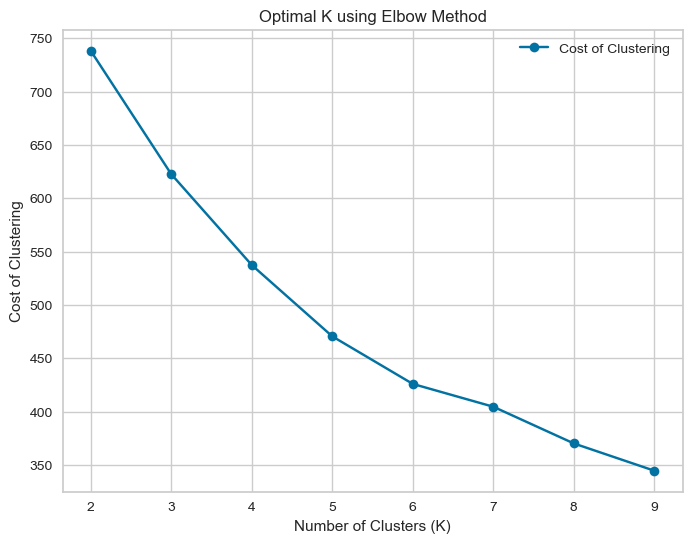

In [121]:
# plot the cost of clustering vs. K
plt.figure(figsize=(8, 6))
plt.plot(k_values, costs, 'bo-', label='Cost of Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost of Clustering')
plt.title('Optimal K using Elbow Method')
plt.legend(loc='upper right')
plt.show()

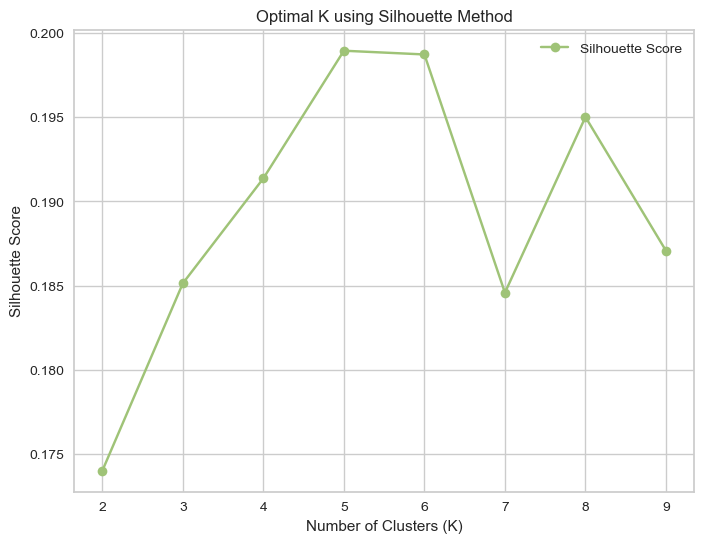

In [122]:
# plot the silhouette score vs. K
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, 'go-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Optimal K using Silhouette Method')
plt.legend(loc='upper right')
plt.show()

OBSERVATION :
* A higher silhouette score indicates better-defined and well-separated clusters.

* The overall silhouette score is the average silhouette score across all data points.A higher silhouette score indicates better clustering results

* A score close to +1 suggests that the data point is well-matched to its own cluster and poorly matched to neighboring clusters, indicating a good clustering result.

* A score close to 0 suggests that the data point is on or very close to the decision boundary between two neighboring clusters, indicating ambiguity in clustering.

* A score close to -1 suggests that the data point is more similar to neighboring clusters than to its own cluster, indicating a potential misclassification.


# Demo- 4

In [123]:
# set K=6 and exploring the clusters using descriptive statistics. This is the selected no of clusters based on Silhouette Score
k = 6

# run K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# explore each cluster using descriptive statistics
for i in range(k):
    cluster_data = df[kmeans.labels_ == i]
    print(f"Cluster {i+1}: {len(cluster_data)} observations")
    print("Descriptive statistics:")
    print(cluster_data.describe())
    print()

Cluster 1: 53 observations
Descriptive statistics:
              X1         X2         X3         X4
count  53.000000  53.000000  53.000000  53.000000
mean   -0.316903  -0.013882  -1.013215   0.311634
std     0.688271   0.627395   0.603547   0.728638
min    -1.852935  -1.464184  -2.787909  -1.036543
25%    -0.663050  -0.423056  -1.368963  -0.310871
50%    -0.240938   0.010834  -0.995909   0.280865
75%     0.169555   0.349844  -0.562575   0.799756
max     1.277523   1.474285  -0.060024   2.125322

Cluster 2: 37 observations
Descriptive statistics:
              X1         X2         X3         X4
count  37.000000  37.000000  37.000000  37.000000
mean   -0.479636   0.686928   0.285193  -1.237421
std     0.549268   0.711200   0.753656   0.546132
min    -1.730223  -0.961614  -0.962539  -2.436709
25%    -0.905438   0.155835  -0.349448  -1.585301
50%    -0.467233   0.735672   0.395154  -1.208948
75%    -0.097790   1.109175   0.809104  -0.929282
max     0.513403   2.214999   1.812287  -0.3461

OBSERVATION:
    
* Number of Clusters: The data has been partitioned into six clusters (Cluster 1 to Cluster 6).

* Cluster Characteristics: Each cluster has its own set of descriptive statistics (mean, standard deviation, minimum, maximum) for the variables X1, X2, X3, and X4.

* Variability: The clusters differ in terms of the standard deviations for the variables. Some clusters have smaller standard deviations, indicating that the data points within those clusters are tightly grouped together, while other clusters show larger standard deviations, indicating more variation within the data points.

* Mean Values: The mean values for each variable differ across clusters, indicating that the clusters have different central tendencies for the variables.

* Range: The range of values for each variable varies within each cluster, implying that there is diversity in the data points within the clusters.